In [30]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [31]:
img  = cv2.imread('./test_images/messi1.jpg')
img.shape

(254, 350, 3)

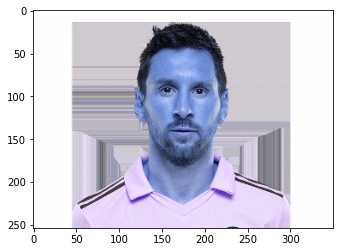

In [32]:
plt.imshow(img)

In [33]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape


(254, 350)

In [34]:
gray

array([[255, 254, 254, ..., 255, 255, 254],
       [255, 254, 254, ..., 255, 255, 254],
       [255, 254, 254, ..., 255, 255, 254],
       ...,
       [255, 254, 254, ..., 255, 255, 254],
       [255, 254, 254, ..., 255, 255, 254],
       [254, 253, 253, ..., 254, 254, 253]], dtype=uint8)

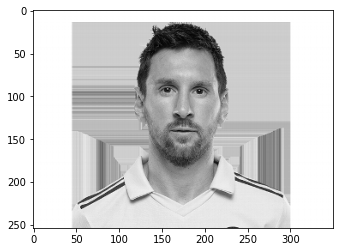

In [35]:
plt.imshow(gray,cmap='gray')

In [36]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces # --> array [x, y, ht, wd]

array([[120,  48, 114, 114]])

In [37]:
(x,y,w,h) = faces[0]
x,y,w,h

(120, 48, 114, 114)

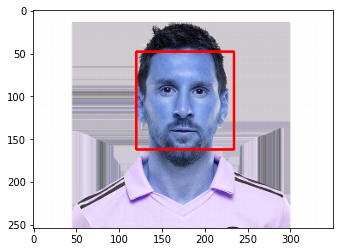

In [38]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

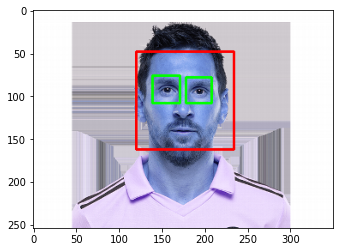

In [39]:
#copied from opencv documentation
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

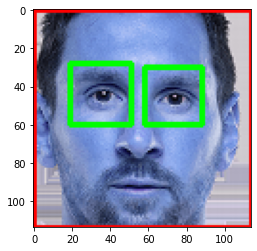

In [40]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [41]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

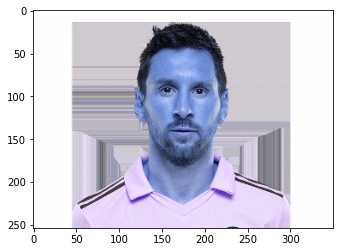

In [42]:
original_image = cv2.imread('./test_images/messi1.jpg')
plt.imshow(original_image)

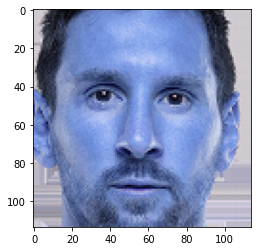

In [43]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/messi1.jpg')
plt.imshow(cropped_image)

In [58]:
path_to_data = "./dataset"
path_to_cr_data = "./dataset/cropped"

In [59]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [60]:
img_dirs

['./dataset\\halaand',
 './dataset\\mbappe',
 './dataset\\messi',
 './dataset\\neymar',
 './dataset\\ronaldo']

In [61]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [62]:
cropped_image_dirs = []
football_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    footballer_name = img_dir.split('\\')[-1]
    print(footballer_name)
    
    football_file_names_dict[footballer_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + '/' + footballer_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = footballer_name + str(count) + ".png"
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            football_file_names_dict[footballer_name].append(cropped_file_path)
            count += 1 
            

halaand
Generating cropped images in folder:  ./dataset/cropped/halaand
mbappe
Generating cropped images in folder:  ./dataset/cropped/mbappe
messi
Generating cropped images in folder:  ./dataset/cropped/messi
neymar
Generating cropped images in folder:  ./dataset/cropped/neymar
ronaldo
Generating cropped images in folder:  ./dataset/cropped/ronaldo


### Wavelet transform

In [63]:
#imported from stackoverflow

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

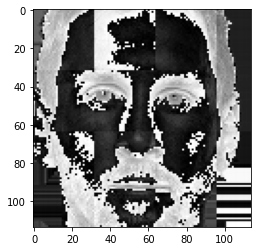

In [64]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap = 'gray')

In [66]:
football_file_names_dict = {}
for img_dir in cropped_image_dirs:
    footballer_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
        football_file_names_dict[footballer_name] = file_list
football_file_names_dict

{'halaand': ['./dataset/cropped/halaand\\halaand1.png',
  './dataset/cropped/halaand\\halaand10.png',
  './dataset/cropped/halaand\\halaand11.png',
  './dataset/cropped/halaand\\halaand12.png',
  './dataset/cropped/halaand\\halaand13.png',
  './dataset/cropped/halaand\\halaand14.png',
  './dataset/cropped/halaand\\halaand15.png',
  './dataset/cropped/halaand\\halaand16.png',
  './dataset/cropped/halaand\\halaand17.png',
  './dataset/cropped/halaand\\halaand18.png',
  './dataset/cropped/halaand\\halaand19.png',
  './dataset/cropped/halaand\\halaand2.png',
  './dataset/cropped/halaand\\halaand20.png',
  './dataset/cropped/halaand\\halaand21.png',
  './dataset/cropped/halaand\\halaand22.png',
  './dataset/cropped/halaand\\halaand23.png',
  './dataset/cropped/halaand\\halaand24.png',
  './dataset/cropped/halaand\\halaand25.png',
  './dataset/cropped/halaand\\halaand3.png',
  './dataset/cropped/halaand\\halaand4.png',
  './dataset/cropped/halaand\\halaand5.png',
  './dataset/cropped/halaand

In [67]:
class_dict = {}
count = 0
for footballer_name in football_file_names_dict.keys():
    class_dict[footballer_name] = count
    count += 1
class_dict

{'halaand': 0, 'mbappe': 1, 'messi': 2, 'neymar': 3, 'ronaldo': 4}

In [68]:
X = []
y = []

for footballer_name, training_files in football_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[footballer_name])
        

In [69]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(142, 4096)

### Training the model

In [70]:
#using SVM with rbf kernel tuned with heuristic finetuning
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)

0.5833333333333334

In [72]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.56      0.71      0.63         7
           2       0.50      0.43      0.46         7
           3       1.00      0.33      0.50         9
           4       0.42      1.00      0.59         5

    accuracy                           0.58        36
   macro avg       0.66      0.62      0.58        36
weighted avg       0.70      0.58      0.58        36



In [73]:
#GridSearch CV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [74]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [75]:
model_params2 = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,25,50,75,100,250,500,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,2,3,4,5,6,7,8,9,10,20]
        }
    }
}

In [76]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.802597,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.519913,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.811255,{'logisticregression__C': 1}


In [77]:
scores2 = []
best_estimators2 = {}
import pandas as pd
for algo, mp in model_params2.items():
    pipe2 = make_pipeline(StandardScaler(), mp['model'])
    clf2 =  GridSearchCV(pipe2, mp['params'], cv=5, return_train_score=False)
    clf2.fit(X_train, y_train)
    scores2.append({
        'model': algo,
        'best_score': clf2.best_score_,
        'best_params': clf2.best_params_
    })
    best_estimators2[algo] = clf2.best_estimator_
    
df2 = pd.DataFrame(scores2,columns=['model','best_score','best_params'])
df2

,model,best_score,best_params
0,svm,0.802597,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,logistic_regression,0.811255,{'logisticregression__C': 1}


In [78]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [79]:
best_estimators2

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [80]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8888888888888888

In [81]:
best_estimators2['logistic_regression'].score(X_test,y_test)

0.8888888888888888

In [82]:
best_estimators['svm'].score(X_test,y_test)

0.8055555555555556

In [83]:
best_estimators2['svm'].score(X_test,y_test)

0.8055555555555556

In [84]:
best_estimators['random_forest'].score(X_test,y_test)

0.5

In [85]:
best_clf = best_estimators['svm']

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[7, 0, 0, 0, 1],
       [0, 7, 0, 0, 0],
       [1, 0, 5, 0, 1],
       [0, 1, 1, 5, 2],
       [0, 0, 0, 0, 5]], dtype=int64)

Text(69.0, 0.5, 'Truth')

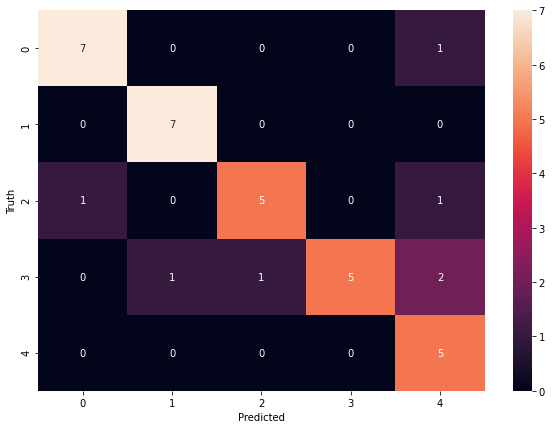

In [87]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [88]:
class_dict

{'halaand': 0, 'mbappe': 1, 'messi': 2, 'neymar': 3, 'ronaldo': 4}

In [89]:
!pip install joblib
import joblib
joblib.dump(best_clf, 'saved_model.pkl') #saved as pickle file

['saved_model.pkl']

In [90]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))